# Visualize Hilbert Matrix in Python

Using `Numpy` and `Matplotlib`.

Code for the following Medium article: [UPDATE](https://medium.com/@pawjast)

**Hilbert matrix:**

$$
  H_{ij} = \frac{1}{i+j-1}
$$

or

$$
  h_{ij} = (i+j-1)^{-1}
$$

## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Settings

In [2]:
# Round Numpy array floats to two digits when printed in the console
np.set_printoptions(formatter={'float': '{: 0.2f}'.format})

## Way 1 (bad): `for` loops

In [3]:
hilbert_mat = np.zeros((5, 5))
hilbert_mat

array([[ 0.00,  0.00,  0.00,  0.00,  0.00],
       [ 0.00,  0.00,  0.00,  0.00,  0.00],
       [ 0.00,  0.00,  0.00,  0.00,  0.00],
       [ 0.00,  0.00,  0.00,  0.00,  0.00],
       [ 0.00,  0.00,  0.00,  0.00,  0.00]])

In [4]:
for i in range(len(hilbert_mat)):
    for j in range(len(hilbert_mat)):
        hilbert_mat[i, j] = 1 / ((i+j)-1 + 2)  # add two since `i` and `j` starts at 0 and not at 1

In [5]:
hilbert_mat

array([[ 1.00,  0.50,  0.33,  0.25,  0.20],
       [ 0.50,  0.33,  0.25,  0.20,  0.17],
       [ 0.33,  0.25,  0.20,  0.17,  0.14],
       [ 0.25,  0.20,  0.17,  0.14,  0.12],
       [ 0.20,  0.17,  0.14,  0.12,  0.11]])

## Way 2 (better): vectorize with numpy

### Step 1: Create mesh of `i` and `j`

In [6]:
i, j = np.mgrid[1:6, 1:6]

### Both `i` and `j` are stored as matrices

In [7]:
i

array([[1, 1, 1, 1, 1],
       [2, 2, 2, 2, 2],
       [3, 3, 3, 3, 3],
       [4, 4, 4, 4, 4],
       [5, 5, 5, 5, 5]])

In [8]:
j

array([[1, 2, 3, 4, 5],
       [1, 2, 3, 4, 5],
       [1, 2, 3, 4, 5],
       [1, 2, 3, 4, 5],
       [1, 2, 3, 4, 5]])

### Step 2: add two matrices

In [9]:
i + j

array([[ 2,  3,  4,  5,  6],
       [ 3,  4,  5,  6,  7],
       [ 4,  5,  6,  7,  8],
       [ 5,  6,  7,  8,  9],
       [ 6,  7,  8,  9, 10]])

### Step 3: subtract constant `-1`

In [10]:
i + j - 1

array([[1, 2, 3, 4, 5],
       [2, 3, 4, 5, 6],
       [3, 4, 5, 6, 7],
       [4, 5, 6, 7, 8],
       [5, 6, 7, 8, 9]])

### Step 4: wrap everything in a fraction

In [11]:
1 / (i + j -1)

array([[ 1.00,  0.50,  0.33,  0.25,  0.20],
       [ 0.50,  0.33,  0.25,  0.20,  0.17],
       [ 0.33,  0.25,  0.20,  0.17,  0.14],
       [ 0.25,  0.20,  0.17,  0.14,  0.12],
       [ 0.20,  0.17,  0.14,  0.12,  0.11]])

### Way 3 (best) - vectorize and wrap in a function

In [12]:
def func_hilbert_mat(shape: int):
    """Return Hilbert matrix given shape."""
    i, j = np.mgrid[1:shape+1, 1:shape+1]
    return 1 / (i + j -1)

In [13]:
func_hilbert_mat(3)

array([[ 1.00,  0.50,  0.33],
       [ 0.50,  0.33,  0.25],
       [ 0.33,  0.25,  0.20]])

In [14]:
func_hilbert_mat(5)

array([[ 1.00,  0.50,  0.33,  0.25,  0.20],
       [ 0.50,  0.33,  0.25,  0.20,  0.17],
       [ 0.33,  0.25,  0.20,  0.17,  0.14],
       [ 0.25,  0.20,  0.17,  0.14,  0.12],
       [ 0.20,  0.17,  0.14,  0.12,  0.11]])

## Visualize - 2D

In [15]:
data = func_hilbert_mat(5)

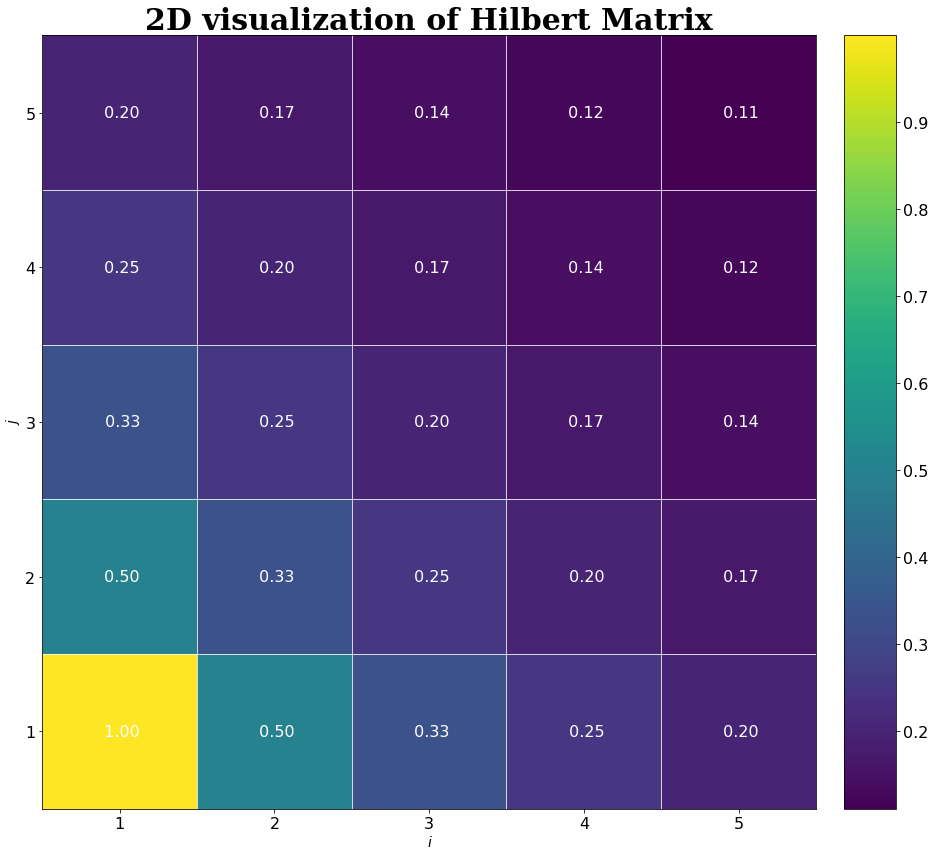

In [16]:
fig, ax = plt.subplots(
    figsize=(16, 12)
)

ax.set_aspect("equal")

ax.set_title(
    "2D visualization of Hilbert Matrix",
    fontsize=30,
    ha="center",
    fontfamily="serif",
    weight="bold"
)

mesh = ax.pcolormesh(
    data
)
cbar = fig.colorbar(
    mesh,
    location="right",
    ticks=np.arange(0.1, 1, 0.1),
    aspect=15,
    pad=0.025
)
cbar.ax.tick_params(
    labelsize=16
)

ax.set_xlabel(
    "i",
    fontsize=14,
    style="italic"
)
ax.set_ylabel(
    "j",
    fontsize=14,
    style="italic"
)

ax.set_xticks(
    ticks=np.arange(0.5, len(data)),
    labels=[f"{t}" for t in np.arange(1, len(data)+1)],
    fontsize=16
)
ax.set_yticks(
    ticks=np.arange(0.5, len(data)),
    labels=[f"{t}" for t in np.arange(1, len(data)+1)],
    fontsize=16
)

# set minor ticks for the grid lines
ax.set_xticks(
    np.arange(0, len(data)),
    minor=True
)
ax.set_yticks(
    np.arange(0, len(data)),
    minor=True
)
ax.grid(
    axis="both",
    which="minor",
    color="white"
)
ax.tick_params(
    axis="both",
    which="minor",
    length=0
)

# add text labels for every square
for i in range(len(data)):
    for j in range(len(data)):
        ax.text(
            i+0.5, j+0.5,
            f"{data[i, j]: .2f}",
            fontsize=16,
            color="white",
            ha="center",
            va="center"
        )

# DEV
plt.tight_layout()

plt.savefig(
    fname="plot1.png",
    facecolor="white",
    format="png",
    dpi=125,
    bbox_inches="tight"
);

## Visualize - 3D

In [17]:
def func_hilbert_mat_3D(shape: int):
    """Return Hilbert matrix and indexes given shape."""
    i, j = np.mgrid[1:shape+1, 1:shape+1]
    return 1 / (i + j -1), i, j

In [18]:
data, i, j = func_hilbert_mat_3D(7)

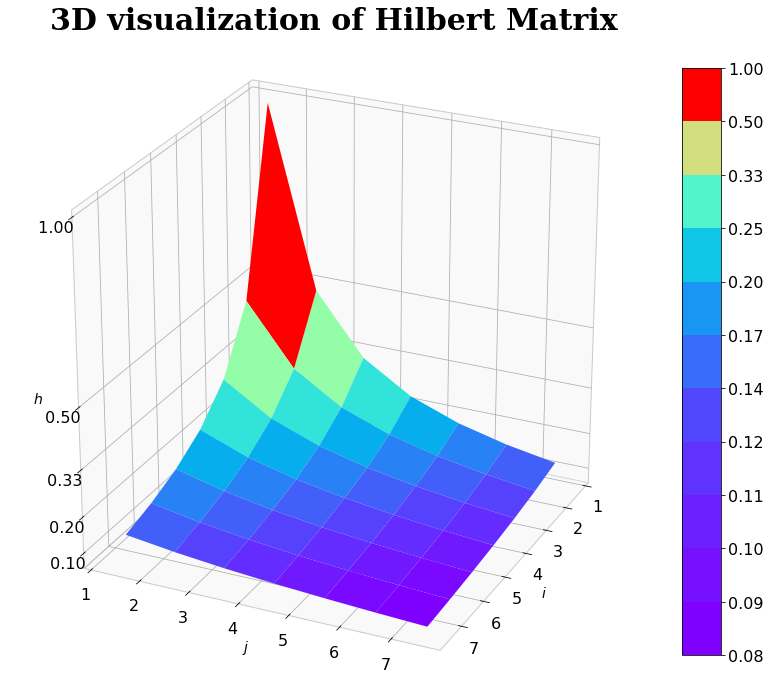

In [19]:
fig = plt.figure(
    figsize=(16, 12)
)

ax = fig.add_subplot(
    projection="3d"
)

ax.set_aspect("equal")

ax.set_title(
    "3D visualization of Hilbert Matrix",
    fontsize=30,
    ha="center",
    fontfamily="serif",
    weight="bold"
)

mesh = ax.plot_surface(
    i, j, data,
    cmap="rainbow"
)

cbar = fig.colorbar(
    mesh,
    location="right",
    ticks=np.unique(np.round(data,2)),
    boundaries=np.unique(np.round(data,2)),
    aspect=15,
    pad=0.025,
    shrink=.9
)
cbar.ax.tick_params(
    labelsize=16
)

ax.view_init(
    elev=25,
    azim=25,
    roll=0
    )

for a in (ax.xaxis, ax.yaxis, ax.zaxis):
    a.pane.set_color("#f6f5f4")
    a.pane.set_edgecolor("#9a9996")
    a.line.set_color((1, 1, 1, 0))  # spine colour

ax.set_xticks(
    ticks=np.arange(0.5, len(data)),
    labels=[f"{x}" for x in np.arange(1, len(data)+1)],
    fontsize=16
)
ax.set_yticks(
    ticks=np.arange(0.5, len(data)),
    labels=[f"{y}" for y in np.arange(1, len(data)+1)],
    fontsize=16
)
ax.set_zticks(
    ticks=[0.1, 0.2, 0.33, 0.5, 1],
    labels=[f"{z: .2f}" for z in [0.1, 0.2, 0.33, 0.5, 1]],
    fontsize=16
)

ax.set_xlabel(
    "i",
    fontsize=14,
    style="italic"
)
ax.set_ylabel(
    "j",
    fontsize=14,
    style="italic"
)
ax.set_zlabel(
    "h",
    fontsize=14,
    style="italic"
)

plt.savefig(
    fname="plot2.png",
    facecolor="white",
    format="png",
    dpi=125,
    bbox_inches="tight"
);